## Análise de Dados de Plataforma de Streaming (com Dados Gerados por IA)

In [127]:
#Import da biblioteca e leitura das bases de dados.
import pandas as pd

plataformas_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\plataformas_distribuicao.csv', sep = ';')

assinantes_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\assinantes.csv', sep = ';')

catalogo_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\catalogo_conteudo.csv', sep = ';')

historico_df = pd.read_csv(r'C:\Users\joa_o\OneDrive\GitHub\Analise_de_dados\Plataform_streaming\historico_visualizacoes_2024.csv', sep = ';')

#display(catalogo_df)
#display(historico_df)
#display(assinantes_df)
#display(plataformas_df)

## 1.Juntar Tabelas: Combine as tabelas para responder a perguntas como:

### Qual o gênero de filme/série mais assistido por assinantes Premium no Brasil?

In [128]:

def genero_mais_assistido_premium_brasil():
    combinado_df = historico_df.merge(assinantes_df, on = 'ID_Assinante', how = 'left')
    combinado_df = combinado_df.merge(catalogo_df, on = 'ID_Conteudo', how = 'left')

    assinantes_premium_brasil_df = combinado_df[(combinado_df['Plano_Assinatura'] == 'Premium') & (combinado_df['Pais'] == 'Brasil')]
    mais_assistido = assinantes_premium_brasil_df['Genero'].value_counts().reset_index()

    mais_assistido.columns = ['Genero', 'Numero_Visualizacoes']
    top_1 = mais_assistido.sort_values(by='Numero_Visualizacoes', ascending = False).iloc[0]
    resposta = (f'O genero de filmes e series mais assistido entre os assinantes Premium do Brasil é: {top_1['Genero']}!')
    return resposta
print(genero_mais_assistido_premium_brasil())
#display(genero_mais_assistido_premium_brasil())

O genero de filmes e series mais assistido entre os assinantes Premium do Brasil é: Ficcao Cientifica!


### Qual a plataforma de distribuição mais utilizada para assistir filmes de ficção científica?

In [129]:

def plataforma_mais_utilizada_para_ficcao():
    df_combinado = historico_df.merge(plataformas_df, on = 'ID_Plataforma')
    df_combinado = df_combinado.merge(catalogo_df, on = 'ID_Conteudo')

    filmes_ficcao = df_combinado[(df_combinado['Genero'] == 'Ficcao Cientifica')]
    plataforma_mais_utilizada = filmes_ficcao['Nome_Plataforma'].value_counts().reset_index()
    plataforma_mais_utilizada.columns = ['Nome_Plataforma', 'Utilizacao']
    top_1 = plataforma_mais_utilizada.sort_values(by = 'Utilizacao', ascending=False).iloc[0]

    resposta = (f'A plataforma mais utilizada para assistir filmes do genero "Ficção Científica" é: {top_1['Nome_Plataforma']}')
    return resposta
print (plataforma_mais_utilizada_para_ficcao())

A plataforma mais utilizada para assistir filmes do genero "Ficção Científica" é: Apple TV


### Qual o título com maior tempo total de visualização?


In [130]:
def titulo_com_maior_visualizacao():
    df_combinado = historico_df.merge(catalogo_df, on = 'ID_Conteudo')
    mais_assistido = df_combinado.groupby('Titulo').sum().reset_index()
    mais_assistido = mais_assistido[['Titulo','Minutos_Assistidos']]
    mais_assistido =  mais_assistido.sort_values(by = 'Minutos_Assistidos', ascending=False)
    top_1 = mais_assistido.sort_values(by = 'Minutos_Assistidos', ascending=False).iloc[0]
    resposta = (f'O título com maior tempo total de visualização é: "{top_1['Titulo']}" com {int(top_1['Minutos_Assistidos'])/60} horas de visualização!')
    return resposta

print (titulo_com_maior_visualizacao())

O título com maior tempo total de visualização é: "O Legado do Código" com 8.75 horas de visualização!


## 2.Filtrar e Selecionar:

### Liste os assinantes que se cadastraram em janeiro de 2024.


In [131]:
def assinantes_cadastrados_janeiro_2024(df):
    copia_df = df
    copia_df['Data_Inicio_Assinatura'] = pd.to_datetime(copia_df['Data_Inicio_Assinatura'])
    janeiro_2024_df = ((copia_df['Data_Inicio_Assinatura'].dt.year == 2024) & (copia_df['Data_Inicio_Assinatura'].dt.month == 1))
    assinantes_filtrados = copia_df[janeiro_2024_df][['Nome', 'Sobrenome', 'Data_Inicio_Assinatura']]
    
    return assinantes_filtrados

print(f'Assinantes que se cadastraram em Janeiro de 2024: \n{assinantes_cadastrados_janeiro_2024(assinantes_df)}')

Assinantes que se cadastraram em Janeiro de 2024: 
       Nome Sobrenome Data_Inicio_Assinatura
6  Gabriela     Nunes             2024-01-01


### Encontre os filmes com avaliação IMDb acima de 8.5 e duração superior a 2 horas.

In [132]:
def Avaliacao_e_mais_de_duas_horas(df):
    combinado_df = df[(df['Tipo_Conteudo'] == 'Filme') & (df['Avaliacao_Media_IMDb'] >= 8.5) & (df['Duracao_Minutos'] > 120)]
    combinado_df['Duracao_Horas']= (combinado_df['Duracao_Minutos']/60).round(2)
    correspondentes_df = combinado_df[['ID_Conteudo', 'Titulo', 'Duracao_Horas', 'Avaliacao_Media_IMDb']]
    return correspondentes_df

#display(Avaliacao_e_mais_de_duas_horas(catalogo_df))

### Quais visualizações não foram completas?

In [133]:
def visualizacao_incompleta():
    combinado_df = historico_df.merge(catalogo_df, on = 'ID_Conteudo')
    combinado_df = combinado_df.merge(assinantes_df, on = 'ID_Assinante')
    combinado_df = combinado_df[['ID_Visualizacao', 'ID_Assinante', 'Nome', 'Sobrenome', 'ID_Conteudo', 'Titulo', 'Completo']]
    visualizacao_incompleta_df = combinado_df[(combinado_df['Completo'] == 'Nao')]
    return visualizacao_incompleta_df

#display(visualizacao_incompleta())

## 3.Agrupar e Agregar: 


### Calcule o tempo médio de visualização por tipo de dispositivo.

In [134]:
def media_por_dispositivo():
    combinado_df = historico_df.merge(plataformas_df, on = 'ID_Plataforma')
    media_por_plataforma = (combinado_df.groupby('Nome_Plataforma')['Minutos_Assistidos'].mean().reset_index()).round(2)
    media_por_plataforma = media_por_plataforma.rename(columns={'Minutos_Assistidos' : 'Media_Minutos_Assistidos'})
    return media_por_plataforma

#display(media_por_dispositivo())


### Quantos assinantes temos por país?

In [135]:
def quantidade_assinantes_por_pais(df):
    df_combinado = df[['Pais']]
    df_combinado['QTD_Assinaturas'] = ((df['ID_Assinante']*0) + 1)
    df_combinado = df_combinado.groupby('Pais').sum().reset_index()
    return df_combinado

#display(quantidade_assinantes_por_pais(assinantes_df))


### Qual o total gasto mensalmente pelos assinantes por tipo de plano?

In [136]:
def total_por_plano(df):
    df_combinado = df[['Plano_Assinatura', 'Gasto_Mensal_USD']]
    df_combinado['QTD_Assinaturas'] = ((df['ID_Assinante']*0) + 1)
    df_combinado = df_combinado.groupby('Plano_Assinatura').sum().reset_index()
    return df_combinado

#display(total_por_plano(assinantes_df))

## 4.Criar Novas Colunas:

### Adicione uma coluna com a idade do assinante.

In [137]:
from datetime import datetime 
assinantes_df = assinantes_df
assinantes_df['Data_Nascimento'] = pd.to_datetime(assinantes_df['Data_Nascimento'])
data_atual = pd.to_datetime(datetime.now().strftime('%Y-%m-%d'))
assinantes_df ['Idade']= data_atual.year - (assinantes_df['Data_Nascimento']).dt.year
aniversario = (assinantes_df['Data_Nascimento'].dt.month > data_atual.month) |((assinantes_df['Data_Nascimento'].dt.month == data_atual.month)&(assinantes_df['Data_Nascimento'].dt.day > data_atual.day))
assinantes_df.loc[aniversario, 'Idade'] -= 1
#display(assinantes_df)


### Calcule o percentual de cada filme/série que foi assistido (Minutos Assistidos / Duração Total).

In [138]:
def percentual_assistido():
    df_combinado = historico_df.merge(catalogo_df, on = 'ID_Conteudo')
    df_combinado = df_combinado[['Titulo', 'Duracao_Minutos', 'Minutos_Assistidos']]
    df_combinado = df_combinado.groupby('Titulo').mean().reset_index()
    df_combinado['Percentual'] = ((df_combinado['Minutos_Assistidos'])/(df_combinado['Duracao_Minutos']))
    df_combinado["Percentual"] = (df_combinado['Percentual'].map('{:.2%}'.format))
    return df_combinado
#display(percentual_assistido())

## 5.Tratar Dados Nulos: 


### Substitua os valores nulos na coluna Avaliacao_Usuario por uma média ou valor padrão.

In [139]:
media_avaliacao = historico_df['Avaliacao_Usuario'].mean()
historico_df['Avaliacao_Usuario'].fillna(int(media_avaliacao), inplace = True)
#display(historico_df)

C:\Users\joa_o\AppData\Local\Temp\ipykernel_17096\3027631617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  historico_df['Avaliacao_Usuario'].fillna(int(media_avaliacao), inplace = True)


## 6.Visualizar Dados: 



### Crie gráficos que mostrem a distribuição de assinantes por plano.

C:\Users\joa_o\AppData\Local\Temp\ipykernel_17096\3284771692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['QTD_Assinatura'] = ((assinantes_df['ID_Assinante']*0) + 1)


<Axes: xlabel='Plano_Assinatura,QTD_Assinatura'>

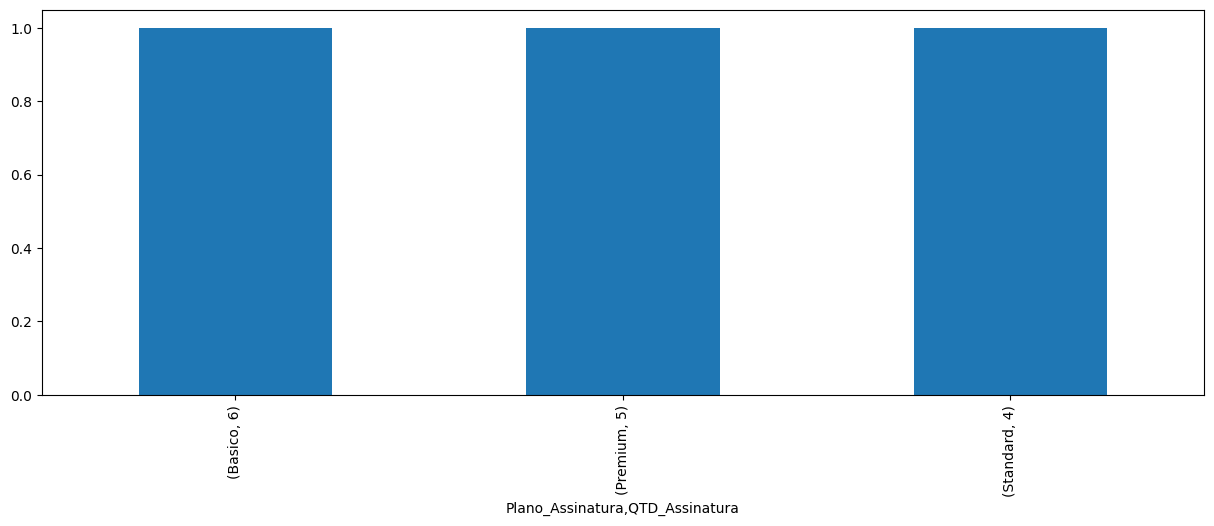

In [140]:
import matplotlib.pyplot as plt
def grafico_assinantes_por_plano():
    df_combinado = assinantes_df
    df_combinado = assinantes_df[['Plano_Assinatura']]
    df_combinado['QTD_Assinatura'] = ((assinantes_df['ID_Assinante']*0) + 1)
    df_combinado = df_combinado.groupby('Plano_Assinatura').sum().reset_index()
    df_combinado = df_combinado.groupby('Plano_Assinatura').value_counts()
    return df_combinado.plot(figsize=(15, 5), kind='bar' )

grafico_assinantes_por_plano()

### Exiba a evolução do número de visualizações ao longo dos meses.

C:\Users\joa_o\AppData\Local\Temp\ipykernel_17096\4156294534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['Data_Visualizacao'] = pd.to_datetime(df_combinado['Data_Visualizacao'])
C:\Users\joa_o\AppData\Local\Temp\ipykernel_17096\4156294534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combinado['QTD_visualizacao'] = ((historico_df['ID_Assinante'] * 0) + 1)
C:\Users\joa_o\AppData\Local\Temp\ipykernel_17096\4156294534.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

,Data_Visualizacao,QTD_visualizacao,Mes_Visualizacao
0,2024-01-05,1,1
1,2024-01-05,1,1
2,2024-01-06,1,1
3,2024-01-06,1,1
4,2024-01-07,1,1
5,2024-01-07,1,1
6,2024-01-08,1,1
7,2024-01-08,1,1
8,2024-01-09,1,1
9,2024-01-09,1,1
